In [154]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [212]:
prefixes = [
    'stockcpu_batch1',
    'stockcpu_batch1_fext',
    'stockcpu_batch2_fext',
    'stockcpu_batch4_fext',
    'stockcpu_batch8_fext',
    'stockcpu_batch16_fext'
]

stats = {}

for prefix in prefixes:
    config = pickle.load(open(f'stats/{prefix}_benchmark_config.pkl', 'rb'))
    data = pickle.load(open(f'stats/{prefix}_stats_final.pkl', 'rb'))
    data['config'] = config
    stats[prefix] = data

In [213]:
stats['stockcpu_batch1']['cumulative_cost']

[332.94985834136605,
 372.2671013281215,
 269.7948609376326,
 276.8500895088073,
 46.57419499265961,
 92.14225961174816,
 194.53019830584526,
 297.6487689015921,
 188.9021435189061,
 70.10279550403357,
 266.11313647404313,
 255.3194147744216,
 143.6211100681685,
 127.24611679185182,
 97.68521029222757,
 131.08775622444227,
 274.3332918777596,
 262.5934375874931,
 434.5961814043112,
 1147.9536513995845,
 1049.9300437737256]

In [214]:
stats.keys()

dict_keys(['stockcpu_batch1', 'stockcpu_batch1_fext', 'stockcpu_batch2_fext', 'stockcpu_batch4_fext', 'stockcpu_batch8_fext', 'stockcpu_batch16_fext'])

In [215]:
for config, v in stats.items():
    print(f'{config} fails: {sum(v["failed"])}')
    

stockcpu_batch1 fails: 1
stockcpu_batch1_fext fails: 10
stockcpu_batch2_fext fails: 0
stockcpu_batch4_fext fails: 0
stockcpu_batch8_fext fails: 1
stockcpu_batch16_fext fails: 2


In [216]:
# print failed indices  
for config, v in stats.items():
    failed_indices = np.where(v['failed'])[0]
    print(f'{config} failed indices: {failed_indices}')
    break


stockcpu_batch1 failed indices: [18]


In [233]:
np.sum(stats['stockcpu_batch1']['cumulative_dist'])

np.float64(2978.4582304525297)

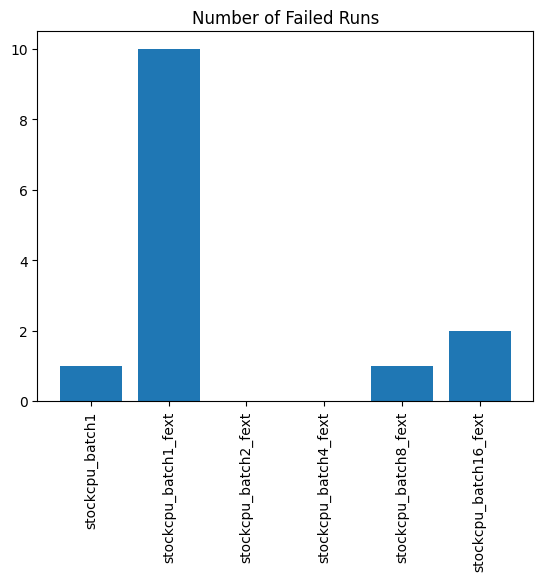

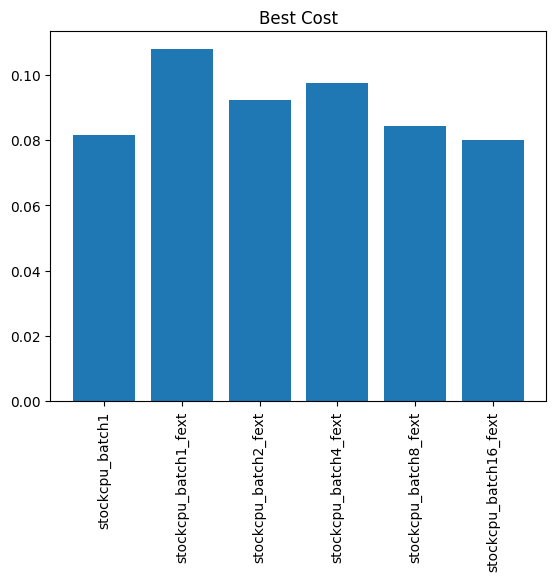

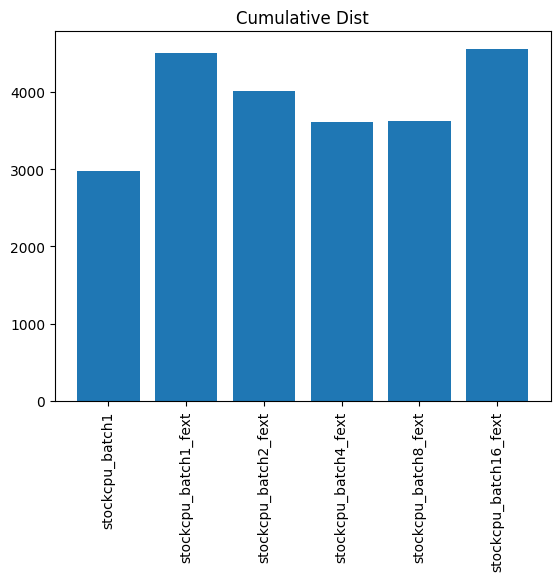

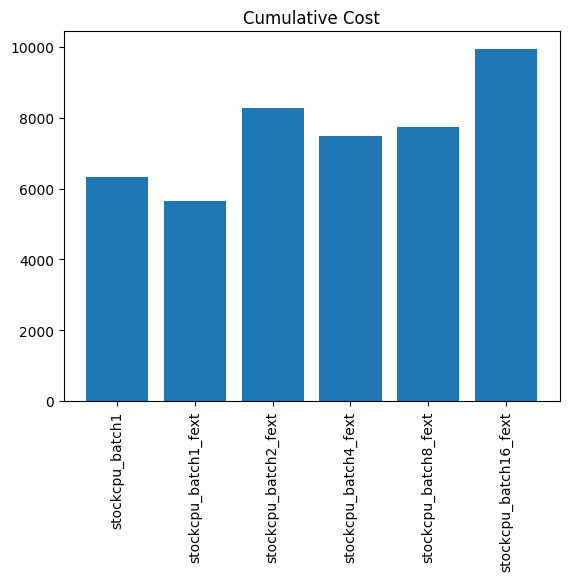

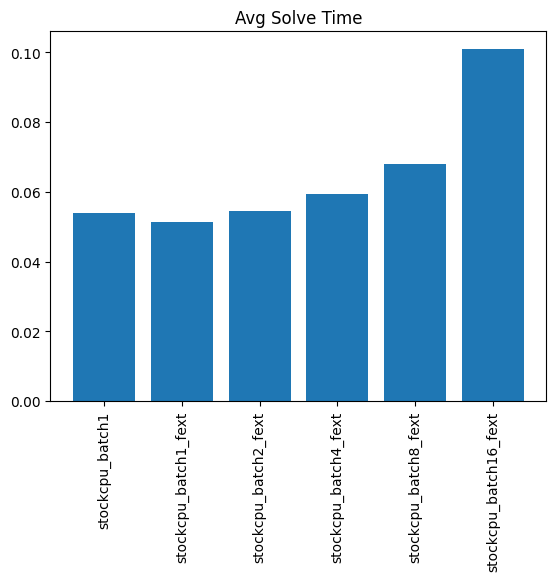

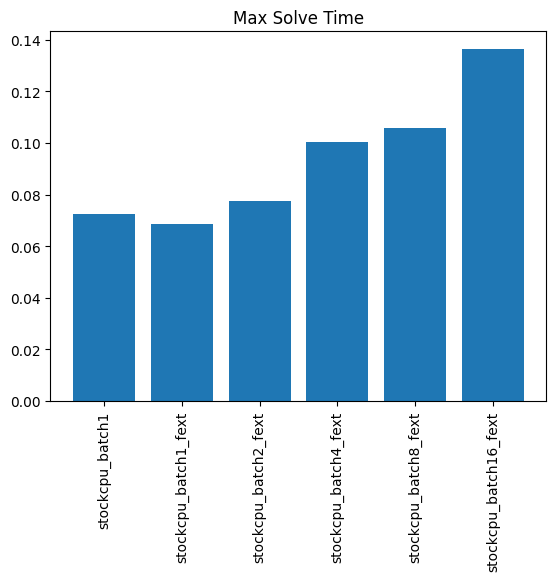

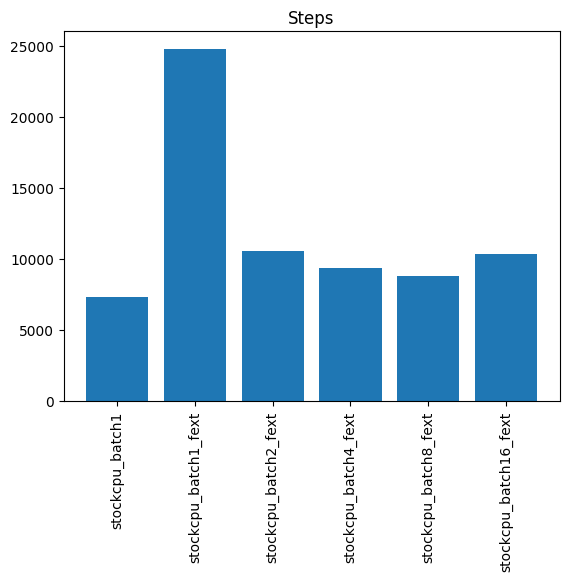

In [ ]:
def boxplot(title, data, labels, ymin=None, ymax=None):
    plt.bar(x=range(len(data)), height=np.sum(data, axis=1), tick_label=labels)
    # rotate labels
    plt.xticks(rotation=90)
    plt.title(title)
    if ymin is not None:
        plt.ylim(ymin, ymax)
    # plt.savefig(f'{title}.png')
    plt.show()

names = [k for k in stats.keys()]

# plot number of failed runs for each config
plt.bar(x=range(len(names)), height=[sum(stats[config]['failed']) for config in stats.keys()], tick_label=names)
plt.xticks(rotation=90)
plt.title('Number of Failed Runs')
# plt.savefig('failed_runs.png')
plt.show()

boxplot('Best Cost', [stats[config]['best_cost'] for config in stats.keys()], names)


boxplot('Cumulative Dist', [stats[config]['cumulative_dist'] for config in stats.keys()], names)

# cumulative cost
boxplot('Cumulative Cost', [stats[config]['cumulative_cost'] for config in stats.keys()], names)

# make a box and whisker plot of the avg solve time for each config
boxplot('Avg Solve Time', [stats[config]['avg_solve_time'] for config in stats.keys()], names)

# max solve time
boxplot('Max Solve Time', [stats[config]['max_solve_time'] for config in stats.keys()], names)

# steps
boxplot('Steps', [stats[config]['steps'] for config in stats.keys()], names)